# Project details - regression

**Background**: You are working as an analyst for a real estate company. Your company wants to build a machine learning model to predict the selling prices of houses based on a variety of features on which the value of the house is evaluated.

**Objective**: The task is to build a model that will predict the price of a house based on features provided in the dataset. The senior management also wants to explore the characteristics of the houses using some business intelligence tool. One of those parameters include understanding which factors are responsible for higher property value - \$650K and above.
The questions have been provided later in the document for which you can use tableau.

**Data**: The data set consists of information on some 22,000 properties.  The dataset consisted of historic data of houses sold between May 2014 to May 2015.
These are the definitions of data points provided:
(Note: For some of the variables that are self explanatory, no definition has been provided)

- **Id**: Unique identification number for the property.
- **date**: date the house was sold.
- **price**: price of the house.
- **waterfront**: house which has a view to a waterfront.
- **condition**: How good the condition is (overall). **1** indicates worn out property and **5** excellent.
- **grade**: Overall grade given to the housing unit, based on King County grading system. 1 poor ,13 excellent.
- **Sqft_above**: square footage of house apart from basement.
- **Sqft_living15**: Living room area in 2015(implies - some renovations). This might or might not have affected the lotsize area.
- **Sqft_lot15**: lotSize area in 2015(implies - some renovations).

### Exploring the data

We encourage you to thoroughly understand your data and take the necessary steps to prepare your data for modeling before building exploratory or predictive models. Since this is a classification model, you can use linear regression for classification for building a model. You are also encouraged to use other models in your project including KNN, decision trees for regression.
To explore the data, you can use the techniques that have been discussed in class. Some of them include using the describe method, checking null values, using _matplotlib_ and _seaborn_ for developing visualizations.
The data has a number of categorical and numerical variables. Explore the nature of data for these variables before you start with the data cleaning process and then data pre-processing (scaling numerical variables and encoding categorical variables).
You will also use powerbi to visually explore the data further.


### Model

Use different models to compare the accuracies and find the model that best fits your data. You can use the measures of accuracies that have been discussed in class. Please note that while comparing different models, make sure you use the same measure of accuracy as a benchmark.


In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import math
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore', '.*do not.*', )
warnings.warn('DelftStack')
warnings.warn('Do not show this message')
%matplotlib inline
data = pd.read_csv("regression_data.csv")
pd.set_option('display.max_columns', None)

C:\Users\PU535KG\AppData\Local\Temp\ipykernel_42768\3365171780.py:8: UserWarning: DelftStack
  warnings.warn('DelftStack')


In [2]:
data.columns=['id','date','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated','zip_code','lat','lon','sqft_living15','sqft_lot15','price']
data.head(2)

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zip_code,lat,lon,sqft_living15,sqft_lot15,price
0,6414100192,12/9/14,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
1,5631500400,2/25/15,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000


<font color='blue'>
Eliminamos duplicados, columnas que consideramos que no afectaran en el modelo predictivo y las filas sin datos. 
</font>

In [3]:
data=data.drop_duplicates()
data=data.drop(['id','date','lat','lon'],axis=1)
data=data.dropna()
data.head(2)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zip_code,sqft_living15,sqft_lot15,price
0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639,538000
1,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062,180000


<font color='green'>
Convertimos el año de la renovacion a años desde la renovacion, hacemos lo mismo con el año de construccion    
</font>

In [4]:
data['yr_last_ren'] = [2015-x if x!=0 else 2015-data.loc[i,'yr_built'] for i,x in enumerate(data['yr_renovated'])]
data.drop(['yr_renovated'],axis =1, inplace = True)

In [5]:
data['yr_old'] = 2016 - data['yr_built']
data.drop(['yr_built'],axis =1, inplace = True)

<font color='green'>
Convertimos el zipcode en categórico  
</font>

In [6]:
data1=data
data['zip_code'] = data['zip_code'].astype('object')
cat=pd.get_dummies(data=data['zip_code'],drop_first=True)
cat

C:\Users\PU535KG\Anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98022,98023,98024,98027,98028,98029,98030,98031,98032,98033,98034,98038,98039,98040,98042,98045,98052,98053,98055,98056,98058,98059,98065,98070,98072,98074,98075,98077,98092,98102,98103,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98122,98125,98126,98133,98136,98144,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21592,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
21593,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
21594,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
data=pd.concat([cat,data],axis=1)

In [8]:
data.head(10)

,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98022,98023,98024,98027,98028,98029,98030,98031,98032,98033,98034,98038,98039,98040,98042,98045,98052,98053,98055,98056,98058,98059,98065,98070,98072,98074,98075,98077,98092,98102,98103,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98122,98125,98126,98133,98136,98144,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zip_code,sqft_living15,sqft_lot15,price,yr_last_ren,yr_old
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,98125,1690,7639,538000,24,65
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1.00,770,10000,1.0,0,0,3,6,770,0,98028,2720,8062,180000,82,83
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,98136,1360,5000,604000,50,51
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,98074,1800,7503,510000,28,29
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,98053,4760,101930,1230000,14,15
5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,98003,2238,6819,257500,20,21
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,98198,1650,9711,291850,52,53
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,98146,1780,8113,229500,55,56
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,98038,2390,7570,323000,12,13
9,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,2.50,3560,9796,1.0,0,0,3,8,1860,1700,98007,2210,8925,662500,50,51


<font color='green'>
Miramos correlación y solo vemos una fuerte correlacion entre sqft_above y sqft_living, la cual es substituida por sqft_living15 posteriormente por lo tanto no nos importara  
</font>

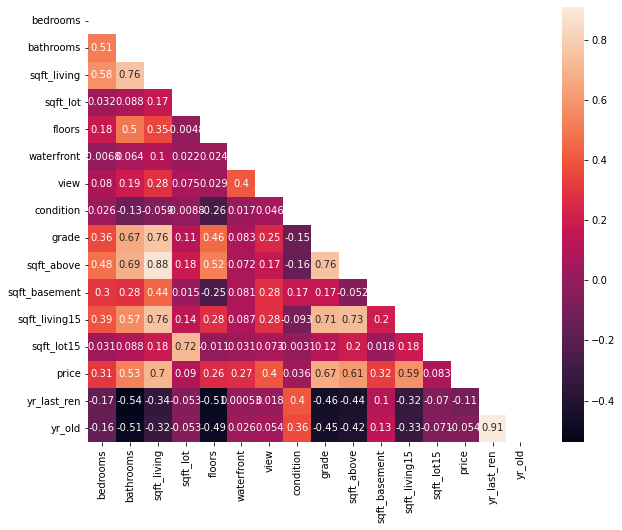

In [9]:
import seaborn as sns
correlations_matrix = data1.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()


<font color='blue'>
Escogemos sqft_living15 y sqft_lot15 ya que son los mas actualizados    
</font>

<AxesSubplot:xlabel='sqft_living15'>

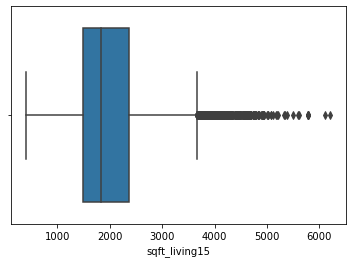

In [10]:
sns.boxplot(data = data, x = 'sqft_living15')

<AxesSubplot:xlabel='price'>

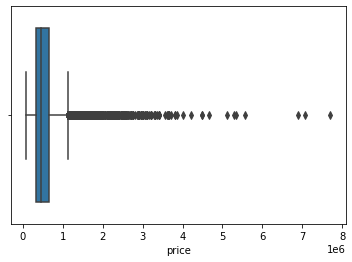

In [11]:
sns.boxplot(data = data, x = 'price')

<AxesSubplot:xlabel='sqft_lot15'>

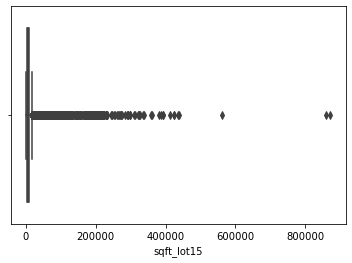

In [12]:
sns.boxplot(data = data, x = 'sqft_lot15')

<font color='green'>
Eliminamos los outliers que generan ruido en el modelo 
</font>

In [13]:
data = data[data['sqft_living15']<= 450000]
data = data[data['price']<= 3000000]
data = data[data['sqft_lot15']<= 175000]

In [14]:
sns.pairplot(data);

<font color='blue'>
Eliminamos la columna de sqft_lot ya que tenemos la del año 2015
</font>

In [15]:
data=data.drop(['sqft_lot','sqft_living'],axis=1)


<font color='blue'>
Estandarizamos con Standard Scaler
</font>

In [16]:
from sklearn.preprocessing import StandardScaler
for c in data.columns[0:-1]:
    data[c]=StandardScaler().fit_transform(data[c].values.reshape(-1, 1))
    data.head()


<font color='blue'>
Creamos los datasets de train y de test con una proporcion de 70/30
</font>

In [17]:
from sklearn.model_selection import train_test_split as tts

x = data.drop(columns = ['price'])
y = data['price']

X_train, X_test, y_train, y_test = tts(x, y, test_size=0.3, random_state=42)
print(x.shape)
print(y.shape)

(21351, 83)
(21351,)


In [18]:
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet


rfr=RFR()
rfr.fit(X_train, y_train)

y_pred_rfr = rfr.predict(X_test)
ridge=Ridge()
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

elastic=ElasticNet()
elastic.fit(X_train, y_train)
y_pred_elastic = elastic.predict(X_test)

lasso=Lasso()
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

from sklearn.linear_model import LinearRegression as LinReg
linreg=LinReg()
linreg.fit(X_train, y_train)
y_pred_linreg=linreg.predict(X_test)

from xgboost import XGBRegressor as XGBR
xgbr=XGBR()
xgbr.fit(X_train, y_train)
y_pred_xgbr = xgbr.predict(X_test)

from lightgbm import LGBMRegressor as LGBMR
lgbmr=LGBMR()
lgbmr.fit(X_train, y_train)
y_pred_lgbmr = lgbmr.predict(X_test)

models=[linreg, lasso, ridge, elastic, rfr, xgbr, lgbmr]
model_names=['linreg', 'lasso', 'ridge', 'elastic', 'rfr', 'xgbr', 'lgbmr']
preds=[y_pred_linreg, y_pred_lasso, y_pred_ridge, y_pred_elastic, y_pred_rfr, y_pred_xgbr, y_pred_lgbmr]
for i in range(len(models)):
    train_score=models[i].score(X_train, y_train)
    test_score=models[i].score(X_test, y_test)
    print ('Model: {}, train R2: {} -- test R2: {}'.format(model_names[i], train_score, test_score))

C:\Users\PU535KG\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\PU535KG\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\PU535KG\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\PU535KG\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\PU535KG\Ana

Model: linreg, train R2: 0.8255436143757638 -- test R2: 0.8199100270147209
Model: lasso, train R2: 0.0012851134156868227 -- test R2: 0.001096120612467999
Model: ridge, train R2: 0.8255435893214784 -- test R2: 0.819909293975641
Model: elastic, train R2: 0.14854798939487646 -- test R2: 0.14285779452408587


C:\Users\PU535KG\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Model: rfr, train R2: 0.9756741840049346 -- test R2: 0.8218220732706689
Model: xgbr, train R2: 0.9587167768659293 -- test R2: 0.8616802612252472
Model: lgbmr, train R2: 0.9209381916905337 -- test R2: 0.8633344810510385


# comentamos los resultados

In [19]:
from sklearn.metrics import mean_absolute_error as mae
for i in range(len(models)):
    train_mae=mae(models[i].predict(X_train), y_train)
    test_mae=mae(preds[i], y_test)
    print ('Model: {}, train MAE: {} -- test MAE: {}'.format(model_names[i], train_mae, test_mae))

C:\Users\PU535KG\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\PU535KG\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\PU535KG\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\PU535KG\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\PU535KG\Ana

Model: linreg, train MAE: 0.26589154040906676 -- test MAE: 0.27431840227752136
Model: lasso, train MAE: 0.6796274193462996 -- test MAE: 0.6890941046588682
Model: ridge, train MAE: 0.26588308411710726 -- test MAE: 0.2743102854415123
Model: elastic, train MAE: 0.619225290241434 -- test MAE: 0.6290781735869905
Model: rfr, train MAE: 0.08972597085762263 -- test MAE: 0.2457203254263043
Model: xgbr, train MAE: 0.14393892445973316 -- test MAE: 0.22447040863143958
Model: lgbmr, train MAE: 0.18924609967136924 -- test MAE: 0.2278005960939347


In [20]:
import pickle
with open('model.pickle', 'wb') as file:
    pickle.dump(lgbmr, file)